In [1]:
import pandas as pd

In [2]:
dftips=pd.read_json('tip.json', lines=True)

In [3]:
dftips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


In [4]:
dftips.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


Duplicados en "user_id":

In [5]:
duplicates_count = dftips['user_id'].duplicated().sum()

print("Cantidad de duplicados en 'user_id':", duplicates_count)

Cantidad de duplicados en 'user_id': 607157


Rango temporal de los datos:

In [6]:
min_date = dftips['date'].min()
max_date = dftips['date'].max()

print("Fecha mínima:", min_date)
print("Fecha máxima:", max_date)

Fecha mínima: 2009-04-16 13:11:49
Fecha máxima: 2022-01-19 20:38:55


Nube de Palabras de la columna "text" que contiene las opiniones de los usuarios:

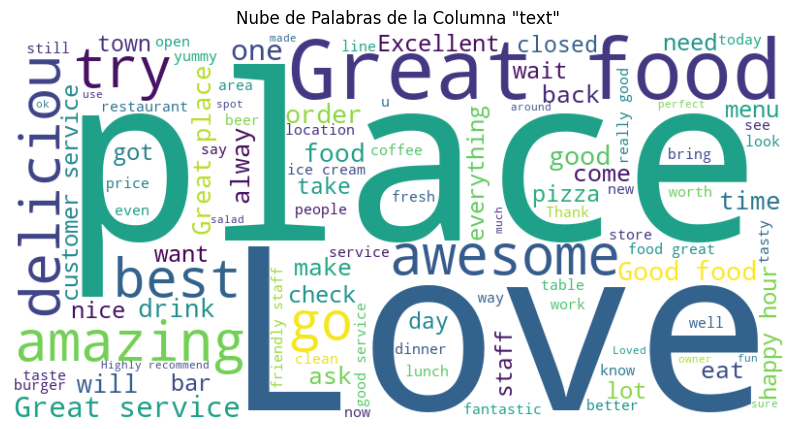

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_text = ' '.join(dftips['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de la Columna "text"')
plt.show()

10 usuarios con más reseñas:

Top 10 Usuarios que Más se Repiten:
user_id
fCvMnJU1Z-XhAjKg99wK3Q    4071
5Y5KbsI5buMcNh2hTFaRpA    1385
lMY8NBPyzlPbbu-KBYfD9A    1373
Rr4cLb6Go91FT134o6RsKg    1230
qjfMBIZpQT9DDtw_BWCopQ    1230
-G7Zkl1wIWBBmD0KRy_sCw    1035
sraTrYU-7q_bQ0TxQrLJvQ     902
I2XpWCHAom1JRyHXZQrnfg     821
xWmYN57XXZbg0LOK8WbbFQ     813
zYFGMy1_thjMnvQLX6JNBw     782
Name: count, dtype: int64


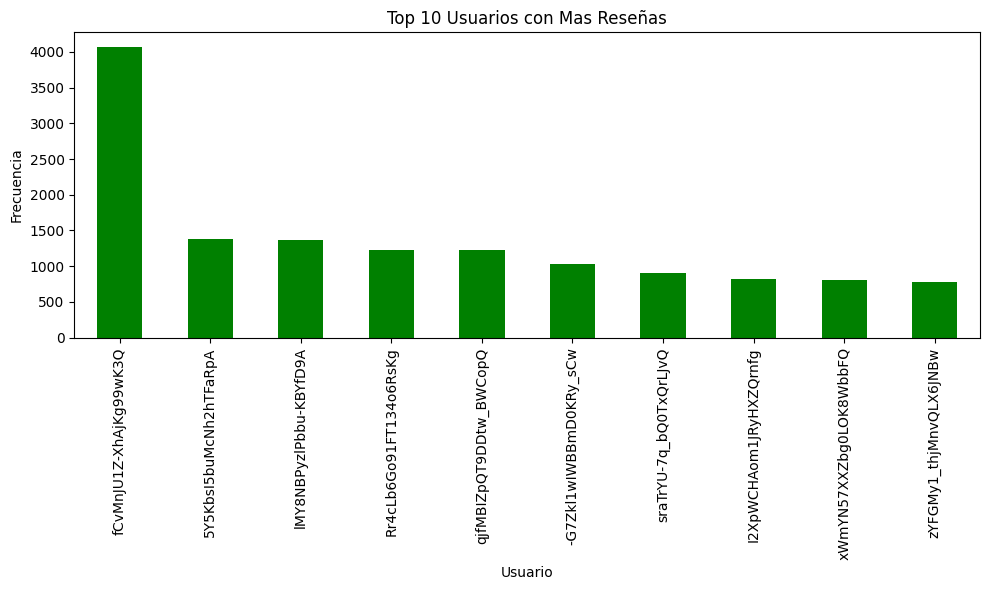

In [16]:
user_id_counts = dftips['user_id'].value_counts()

top_users = user_id_counts.head(10)

print("Top 10 Usuarios que Más se Repiten:")
print(top_users)

plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='green')
plt.xlabel('Usuario')
plt.ylabel('Frecuencia')
plt.title('Top 10 Usuarios con Mas Reseñas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()